# Monash Time Series Forecasting Datasets

[![Open in Colab](https://lab.aef.me/files/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/lab/blob/main/files/monash.ipynb)
[![Open in Kaggle](https://lab.aef.me/files/assets/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/adamelliotfields/lab/blob/main/files/monash.ipynb)
[![Render nbviewer](https://lab.aef.me/files/assets/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/lab/blob/main/files/monash.ipynb)

Exploring the [Monash](https://forecastingdata.org) datasets from 🤗 [Hub](https://huggingface.co/datasets/monash_tsf).

**Contents**
* [Australian Electricity Demand](#australian-electricity-demand)
* [Oikolab Weather](#oikolab-weather)
* [Saugeen River Flow](#saugeen-river-flow)
* [US Births](#us-births)

In [1]:
%pip install -q datasets

In [2]:
import calendar
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from datasets import load_dataset
from datetime import datetime


# helper
def make_time_series_df(row, freq="1D"):
    ds = pd.date_range(
        pd.to_datetime(row["start"]),
        periods=len(row["target"]),
        freq=freq,
    )
    y = row["target"]
    df = pd.DataFrame({"ds": ds, "y": y})
    df.set_index("ds", inplace=True)
    return df

In [3]:
# @title 🤗 Token
HF_TOKEN = None  # @param {type:"string"}
HF_TOKEN = os.getenv("HF_TOKEN", HF_TOKEN)
os.environ["HF_TOKEN"] = HF_TOKEN

if HF_TOKEN is None:
    raise ValueError("HF_TOKEN not set")

## Australian Electricity Demand

https://zenodo.org/records/4659727

This dataset contains 5 time series representing the half hourly electricity demand of 5 states in Australia: Victoria, New South Wales, Queensland, Tasmania and South Australia.

In [4]:
demand = load_dataset("monash_tsf", "australian_electricity_demand", split="train").to_pandas()
demand

,start,target,feat_static_cat,feat_dynamic_real,item_id
0,2002-01-01,"[5714.045, 5360.189, 5014.835, 4602.7554, 4285...",[0],None,T1
1,2002-01-01,"[3535.867, 3383.499, 3655.5276, 3510.4465, 329...",[1],None,T2
2,2002-01-01,"[3382.0413, 3288.3157, 3172.329, 3020.313, 291...",[2],None,T3
3,2002-01-01,"[1191.078, 1219.5895, 1119.1735, 1016.4072, 92...",[3],None,T4
4,2002-01-01,"[315.9155, 306.24585, 305.76257, 295.6022, 290...",[4],None,T5


In [5]:
victoria = make_time_series_df(demand.iloc[0], freq="30min")
new_south_wales = make_time_series_df(demand.iloc[1], freq="30min")
queensland = make_time_series_df(demand.iloc[2], freq="30min")
tasmania = make_time_series_df(demand.iloc[3], freq="30min")
south_australia = make_time_series_df(demand.iloc[4], freq="30min")

victoria.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230616 entries, 2002-01-01 00:00:00 to 2015-02-26 11:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       230616 non-null  float32
dtypes: float32(1)
memory usage: 2.6 MB


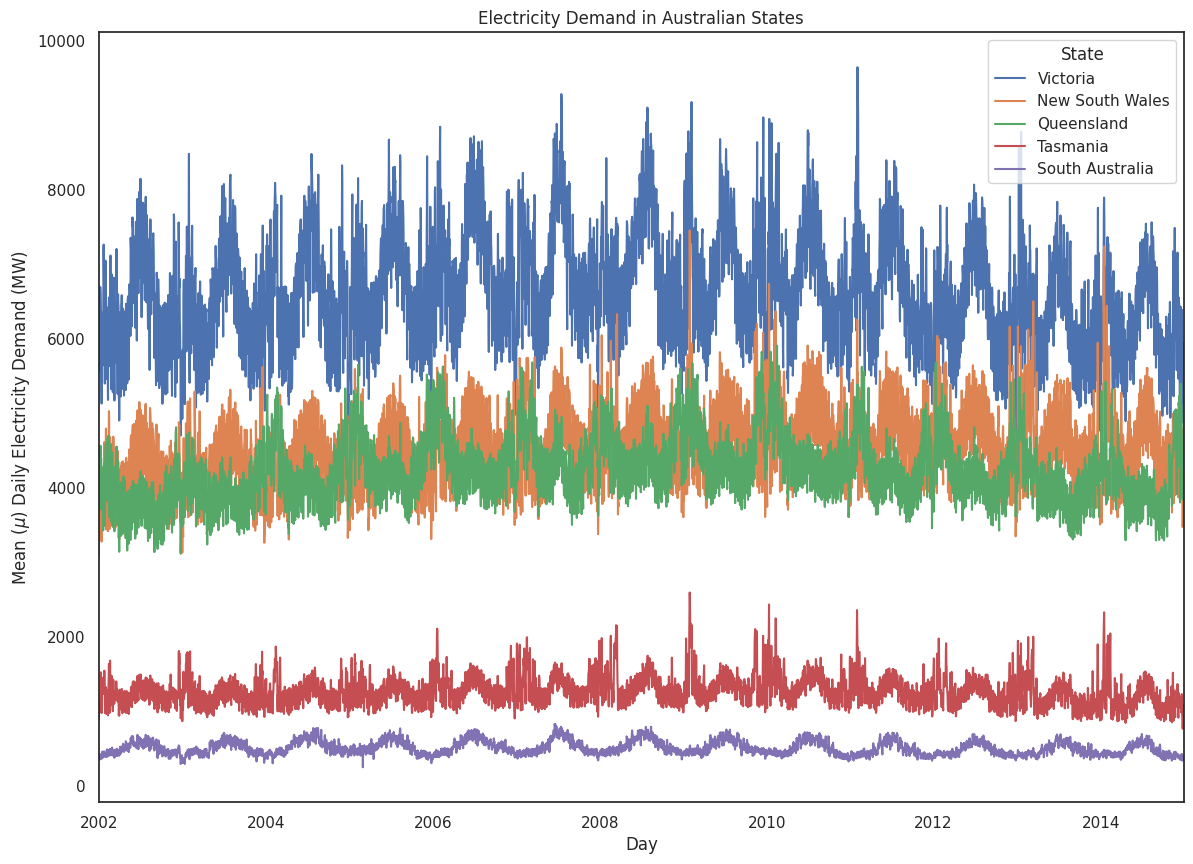

In [6]:
victoria_daily = victoria.resample("D").mean()
new_south_wales_daily = new_south_wales.resample("D").mean()
queensland_daily = queensland.resample("D").mean()
tasmania_daily = tasmania.resample("D").mean()
south_australia_daily = south_australia.resample("D").mean()

plt.figure(figsize=(14, 10))

sns.set_theme(style="white")
sns.lineplot(victoria_daily, x=victoria_daily.index, y="y", label="Victoria")
sns.lineplot(new_south_wales_daily, x=new_south_wales_daily.index, y="y", label="New South Wales")
sns.lineplot(queensland_daily, x=queensland_daily.index, y="y", label="Queensland")
sns.lineplot(tasmania_daily, x=tasmania_daily.index, y="y", label="Tasmania")
sns.lineplot(south_australia_daily, x=south_australia_daily.index, y="y", label="South Australia")

plt.title("Electricity Demand in Australian States")
plt.xlim(datetime(2002, 1, 1), datetime(2014, 12, 31))
plt.xlabel("Day")
plt.ylabel(r"Mean ($\mu$) Daily Electricity Demand (MW)")
plt.legend(title="State")
plt.show()

## Oikolab Weather

https://zenodo.org/records/5184708

This dataset was kindly provided by [OikoLab](https://oikolab.com). It contains eight time series representing the hourly climate data nearby Monash University, Clayton, Victoria, Australia from 2010-01-01 to 2021-05-31. The climate data include temperature (C), dewpoint temperature (C), wind speed (m/s), mean sea level pressure (Pa), relative humidity (0-1), surface solar radiation (W/m^2), surface thermal radiation (W/m^2) and total cloud cover (0-1).

In [7]:
weather = load_dataset("monash_tsf", "oikolab_weather", split="train").to_pandas()
weather

,start,target,feat_static_cat,feat_dynamic_real,item_id
0,2010-01-01,"[18.26, 18.67, 18.16, 18.46, 18.53, 18.92, 19....",[0],None,T1-temperature
1,2010-01-01,"[16.39, 16.29, 15.89, 15.33, 15.11, 15.16, 15....",[1],None,T2-dewpoint_temperature
2,2010-01-01,"[2.6, 2.91, 3.26, 3.17, 2.95, 2.62, 2.87, 3.01...",[2],None,T3-wind_speed
3,2010-01-01,"[101046.38, 101037.96, 101017.26, 101022.56, 1...",[3],None,T4-mean_sea_level_pressure
4,2010-01-01,"[0.89, 0.86, 0.87, 0.82, 0.8, 0.79, 0.77, 0.76...",[4],None,T5-relative_humidity
5,2010-01-01,"[287.01, 360.79, 291.54, 357.11, 459.91, 513.0...",[5],None,T6-surface_solar_radiation
6,2010-01-01,"[408.35, 411.02, 410.67, 410.95, 410.0, 407.46...",[6],None,T7-surface_thermal_radiation
7,2010-01-01,"[1.0, 1.0, 1.0, 1.0, 0.9, 0.96, 0.94, 0.9, 0.8...",[7],None,T8-total_cloud_cover


In [8]:
temperature = make_time_series_df(weather.iloc[0], freq="1h")
dewpoint_temperature = make_time_series_df(weather.iloc[1], freq="1h")
wind_speed = make_time_series_df(weather.iloc[2], freq="1h")
mean_sea_level_pressure = make_time_series_df(weather.iloc[3], freq="1h")
relative_humidity = make_time_series_df(weather.iloc[4], freq="1h")
surface_solar_radiation = make_time_series_df(weather.iloc[5], freq="1h")
surface_thermal_radiation = make_time_series_df(weather.iloc[6], freq="1h")
total_cloud_cover = make_time_series_df(weather.iloc[7], freq="1h")

temperature_daily = temperature.resample("D").mean()
dewpoint_temperature_daily = dewpoint_temperature.resample("D").mean()
wind_speed_daily = wind_speed.resample("D").mean()
mean_sea_level_pressure_daily = mean_sea_level_pressure.resample("D").mean()
relative_humidity_daily = relative_humidity.resample("D").mean()
surface_solar_radiation_daily = surface_solar_radiation.resample("D").mean()
surface_thermal_radiation_daily = surface_thermal_radiation.resample("D").mean()
total_cloud_cover_daily = total_cloud_cover.resample("D").mean()

temperature_daily.head()

,y
ds,
2010-01-01,17.699167
2010-01-02,15.915417
2010-01-03,15.225834
2010-01-04,18.771666
2010-01-05,17.940832


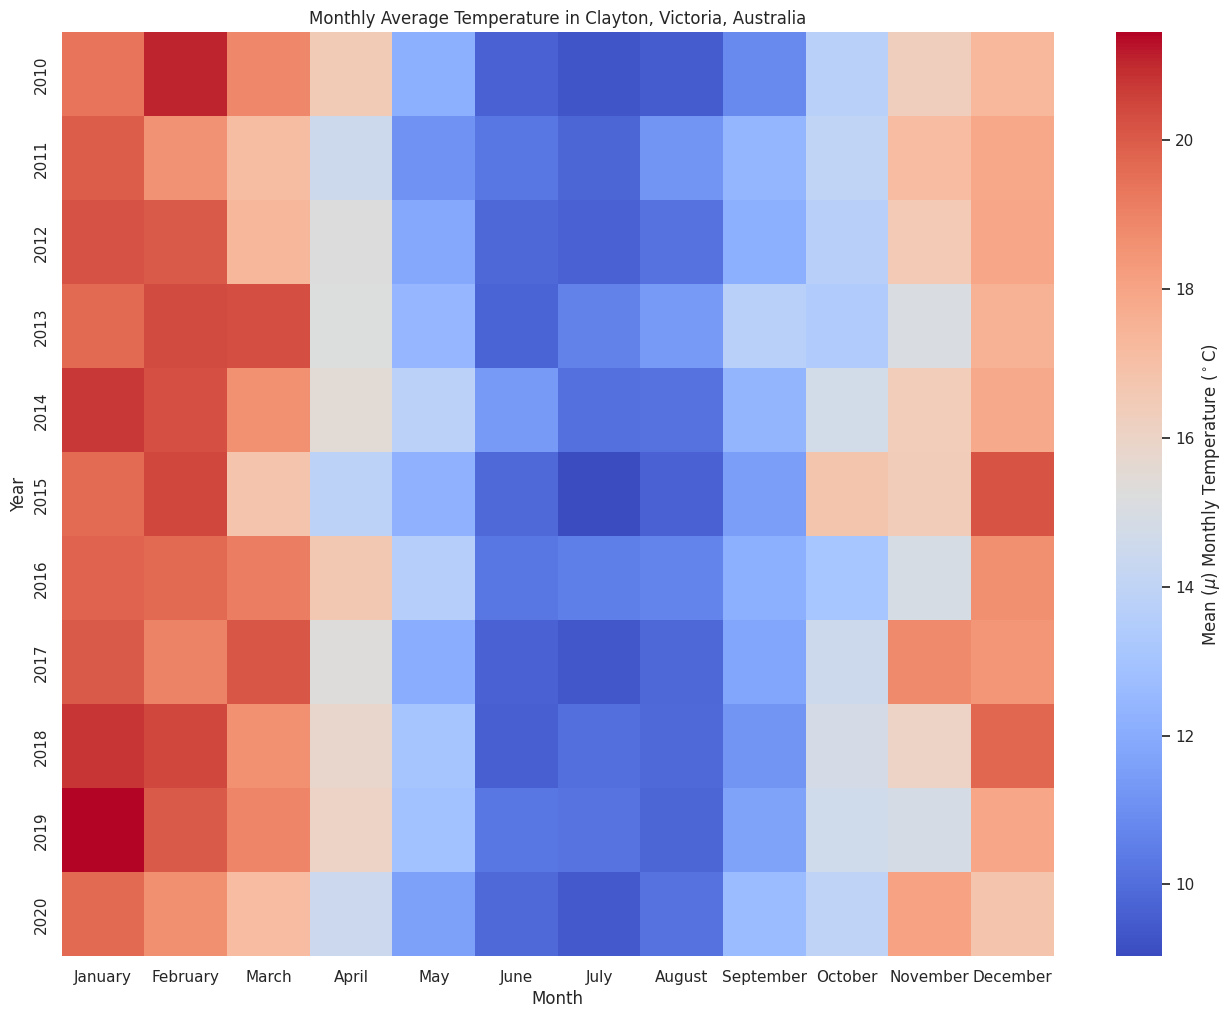

In [9]:
# monthly average temperature heatmap
temperature_monthly = temperature.resample("M").mean()  # ME in Pandas 2
temperature_monthly["month"] = temperature_monthly.index.month
temperature_monthly["year"] = temperature_monthly.index.year

mean_temperature_monthly = temperature_monthly.groupby(["year", "month"]).mean().unstack()

plt.figure(figsize=(16, 12))

sns.set_theme(style="white")
sns.heatmap(
    # drop the first 6 months of 2021
    mean_temperature_monthly.loc[:2020],
    cmap="coolwarm",
    cbar_kws={"label": r"Mean ($\mu$) Monthly Temperature ($^\circ$C)"},
    xticklabels=calendar.month_name[1:],
)

plt.title("Monthly Average Temperature in Clayton, Victoria, Australia")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

## Saugeen River Flow

https://zenodo.org/records/4656058

This dataset contains a single very long time series representing the daily mean flow of the Saugeen River in Walkerton, Ontario, Canada in cubic meters per second from 01/01/1915 to 31/12/1979.

In [10]:
river = load_dataset("monash_tsf", "saugeenday", split="train").to_pandas()
river = make_time_series_df(river.iloc[0])
river.head()

,y
ds,
1915-01-01,11.5
1915-01-02,10.8
1915-01-03,13.7
1915-01-04,13.7
1915-01-05,14.4


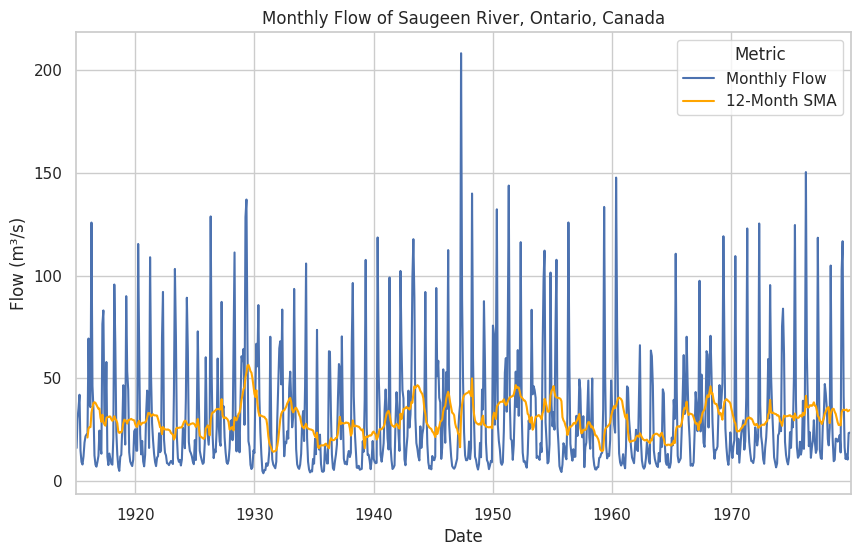

In [11]:
river_monthly = river.resample("M").mean()  # ME in Pandas 2

plt.figure(figsize=(10, 6))

sns.set_theme(style="whitegrid")
sns.lineplot(river_monthly, x=river_monthly.index, y="y", label="Monthly Flow")
sns.lineplot(
    river_monthly.rolling(window=12).mean(),
    x=river_monthly.index,
    y="y",
    label="12-Month SMA",
    color="orange",
)

plt.title("Monthly Flow of Saugeen River, Ontario, Canada")
plt.xlim(datetime(1915, 1, 1), datetime(1979, 12, 31))
plt.xlabel("Date")
plt.ylabel("Flow (m³/s)")
plt.legend(title="Metric")
plt.show()

## US Births

https://zenodo.org/records/4656049

This dataset contains a single very long daily time series representing the number of births in US from 01-01-1969 to 11-01-1988.

In [12]:
births = load_dataset("monash_tsf", "us_births", split="train").to_pandas()
births = make_time_series_df(births.iloc[0])
births.head()

,y
ds,
1969-01-01,8486.0
1969-01-02,9002.0
1969-01-03,9542.0
1969-01-04,8960.0
1969-01-05,8390.0


In [13]:
# 1988 is incomplete so we drop it
births_monthly = births.resample("M").sum().loc["01-01-1969":"12-31-1987"]  # ME in Pandas 2

# births don't need to be floats
births_monthly["y"] = births_monthly["y"].astype(int)
births_monthly.head()

,y
ds,
1969-01-31,293876
1969-02-28,270534
1969-03-31,296436
1969-04-30,282470
1969-05-31,289018


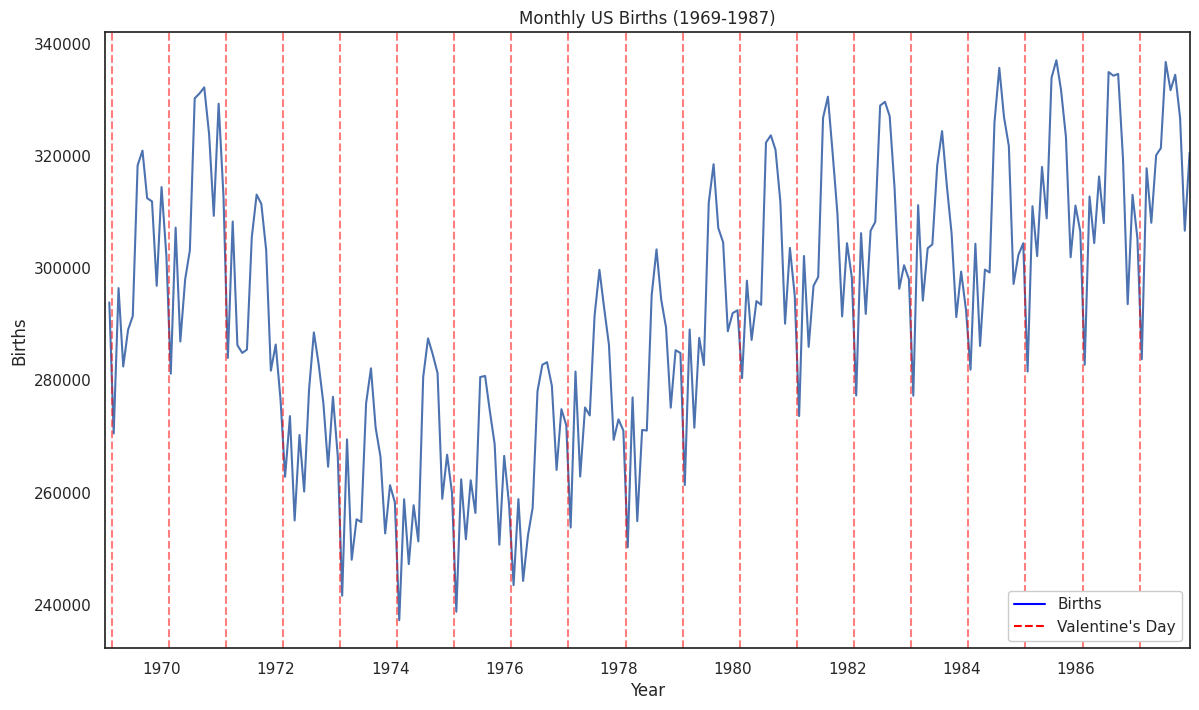

In [14]:
plt.figure(figsize=(14, 8))

sns.set_theme(style="white")
sns.lineplot(
    births_monthly,
    x=births_monthly.index,
    y="y",
    label="Monthly Births",
)

plt.title("Monthly US Births (1969-1987)")
plt.xlim(datetime(1969, 1, 1), datetime(1987, 12, 31))
plt.xlabel("Year")
plt.ylabel("Births")

# mark valentine's day each year
for year in range(1969, 1988):
    plt.axvline(
        datetime(year, 2, 14),
        color="red",
        linestyle="--",
        alpha=0.5,
    )

# custom legend with births and valentine's day handles
# position legend bottom right and remove background transparency
plt.legend(
    handles=[
        plt.Line2D([0], [0], color="blue", label="Births"),
        plt.Line2D([0], [0], color="red", linestyle="--", label="Valentine's Day"),
    ],
    loc="lower right",
    framealpha=1,
)

plt.show()